In [148]:
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler

import joblib

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [70]:
document_embeddings_train = pd.read_parquet(
    path='../dataset/featured/frzd_olist_document_embeddings_train.parquet.snappy',
    engine='pyarrow'
)

In [71]:
document_embeddings_test = pd.read_parquet(
    path='../dataset/featured/frzd_olist_document_embeddings_test.parquet.snappy',
    engine='pyarrow'
)

In [72]:
document_labels_train = document_embeddings_train.pop('review_sentiment')
document_labels_test = document_embeddings_test.pop('review_sentiment')

In [73]:
X_train = document_embeddings_train.values
X_test = document_embeddings_test.values
y_train = document_labels_train.values
y_test = document_labels_test.values

In [74]:
scaler = StandardScaler()

In [75]:
scaler.fit(X_train)

StandardScaler()

In [76]:
X_train_scaled = scaler.transform(X_train)

In [77]:
X_test_scaled = scaler.transform(X_test)

In [87]:
parameters = {
    'C'      : [10],
    'kernel' : ['rbf'],
    'gamma'  : [0.0001],
}

svm = SVC(
    class_weight='balanced',
    decision_function_shape='ovo',
    cache_size=12000,
)

grid_search = GridSearchCV(
    estimator=svm,
    param_grid=parameters, 
    cv=5,
    scoring='f1_weighted', 
    verbose=4,
    n_jobs=-1,
    refit=True
)

In [88]:
grid_search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=5,
             estimator=SVC(cache_size=12000, class_weight='balanced',
                           decision_function_shape='ovo'),
             n_jobs=-1,
             param_grid={'C': [10], 'gamma': [0.0001], 'kernel': ['rbf']},
             scoring='f1_weighted', verbose=4)

In [89]:
grid_search.best_params_

{'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}

In [90]:
optimal_svm = grid_search.best_estimator_

In [84]:
joblib.dump(optimal_svm, '../model/review_sentiment_classification/svm_rbf.plk')

['../model/review_sentiment_classification/svm_rbf.plk']

In [92]:
optimal_svm = joblib.load('../model/review_sentiment_classification/svm_rbf.plk')

In [93]:
optimal_svm

SVC(C=10, cache_size=12000, class_weight='balanced',
    decision_function_shape='ovo', gamma=0.0001)

In [95]:
y_train_pred = optimal_svm.predict(X_train_scaled)

In [96]:
scores = classification_report(y_train, y_train_pred, target_names=['negative', 'neutral', 'positive'])
print(scores)

              precision    recall  f1-score   support

    negative       0.83      0.74      0.78      3301
     neutral       0.42      0.56      0.48      1481
    positive       0.92      0.91      0.92     11730

    accuracy                           0.85     16512
   macro avg       0.72      0.74      0.73     16512
weighted avg       0.86      0.85      0.85     16512



In [97]:
y_test_pred = optimal_svm.predict(X_test_scaled)

In [98]:
scores = classification_report(y_test, y_test_pred, target_names=['negative', 'neutral', 'positive'])
print(scores)

              precision    recall  f1-score   support

    negative       0.67      0.60      0.63       825
     neutral       0.22      0.28      0.25       370
    positive       0.89      0.88      0.88      2934

    accuracy                           0.77      4129
   macro avg       0.59      0.59      0.59      4129
weighted avg       0.78      0.77      0.78      4129



Linear SVM

In [122]:
parameters = {
    'alpha': [1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100, 1000],
    'l1_ratio': np.arange(0, 1.01, 0.01),
}

n = int(np.ceil(10**6 / X_train_scaled.shape[0]))

sgd_linear_svm = SGDClassifier(
    loss='hinge',
    class_weight='balanced', 
    max_iter=n,
    early_stopping=True,
    shuffle=True,
    n_jobs=-1
)

grid_search_linear_svm = GridSearchCV(
    estimator=sgd_linear_svm,
    param_grid=parameters,
    cv=5, 
    scoring='f1_weighted',
    verbose=4,
    n_jobs=-1, 
    refit=True
)

In [123]:
grid_search_linear_svm.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 808 candidates, totalling 4040 fits


GridSearchCV(cv=5,
             estimator=SGDClassifier(class_weight='balanced',
                                     early_stopping=True, max_iter=61,
                                     n_jobs=-1),
             n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'l1_ratio': array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31,...
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  ])},
             scoring='f1_weighted', verbose=4)

In [130]:
joblib.dump(grid_search_linear_svm.best_estimator_, '../model/review_sentiment_classification/linear_svm.plk')

['../model/review_sentiment_classification/linear_svm.plk']

In [131]:
optimal_linear_svm = joblib.load('../model/review_sentiment_classification/linear_svm.plk')

In [132]:
optimal_linear_svm

SGDClassifier(alpha=100, class_weight='balanced', early_stopping=True,
              l1_ratio=0.02, max_iter=61, n_jobs=-1)

In [133]:
y_train_pred = optimal_linear_svm.predict(X_train_scaled)

In [134]:
scores = classification_report(y_train, y_train_pred, target_names=['negative', 'neutral', 'positive'])
print(scores)

              precision    recall  f1-score   support

    negative       0.77      0.83      0.80      3301
     neutral       0.49      0.47      0.48      1481
    positive       0.93      0.91      0.92     11730

    accuracy                           0.86     16512
   macro avg       0.73      0.74      0.73     16512
weighted avg       0.86      0.86      0.86     16512



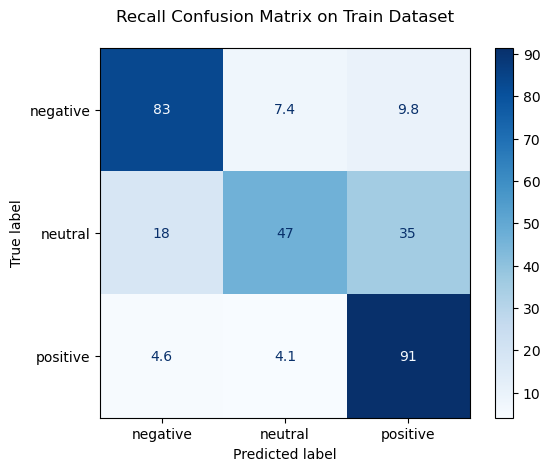

In [189]:
train_matrix = confusion_matrix(y_train, y_train_pred, normalize='true') * 100
confusion_matrix_display = ConfusionMatrixDisplay(train_matrix, display_labels=['negative', 'neutral', 'positive'])
confusion_matrix_display.plot(cmap='Blues')
plt.title('Recall Confusion Matrix on Train Dataset', y=1.05)
plt.savefig('../visualizations/linear_svm_train_confusion_matrix_recall_normalized.png')
plt.show()

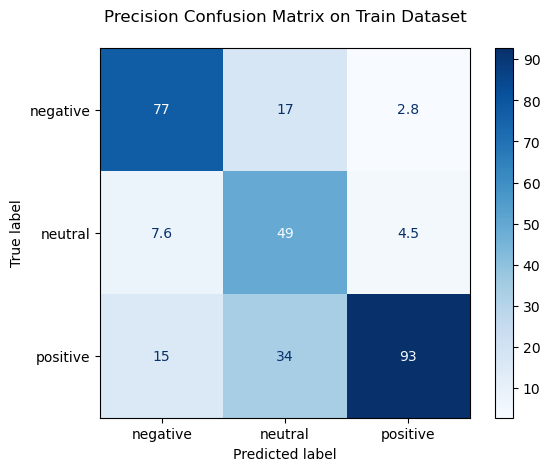

In [188]:
train_matrix = confusion_matrix(y_train, y_train_pred, normalize='pred') * 100
confusion_matrix_display = ConfusionMatrixDisplay(train_matrix, display_labels=['negative', 'neutral', 'positive'])
confusion_matrix_display.plot(cmap='Blues')
plt.title('Precision Confusion Matrix on Train Dataset', y=1.05)
plt.savefig('../visualizations/linear_svm_train_confusion_matrix_precision_normalized.png')
plt.show()

In [135]:
y_test_pred = optimal_linear_svm.predict(X_test_scaled)

In [136]:
scores = classification_report(y_test, y_test_pred, target_names=['negative', 'neutral', 'positive'])
print(scores)

              precision    recall  f1-score   support

    negative       0.64      0.71      0.67       825
     neutral       0.22      0.20      0.21       370
    positive       0.90      0.88      0.89      2934

    accuracy                           0.79      4129
   macro avg       0.59      0.59      0.59      4129
weighted avg       0.78      0.79      0.78      4129



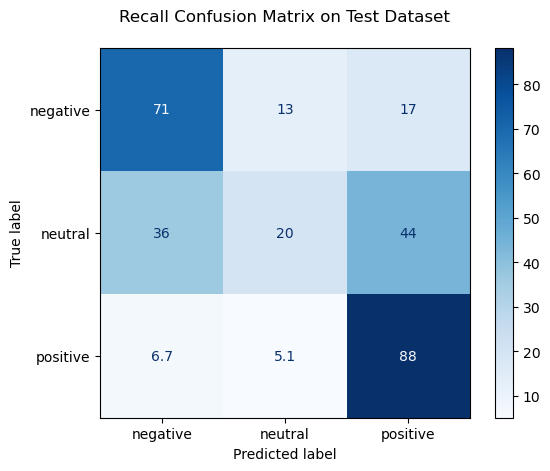

In [191]:
train_matrix = confusion_matrix(y_test, y_test_pred, normalize='true') * 100
confusion_matrix_display = ConfusionMatrixDisplay(train_matrix, display_labels=['negative', 'neutral', 'positive'])
confusion_matrix_display.plot(cmap='Blues')
plt.title('Recall Confusion Matrix on Test Dataset', y=1.05)
plt.savefig('../visualizations/linear_svm_test_confusion_matrix_recall_normalized.png')
plt.show()

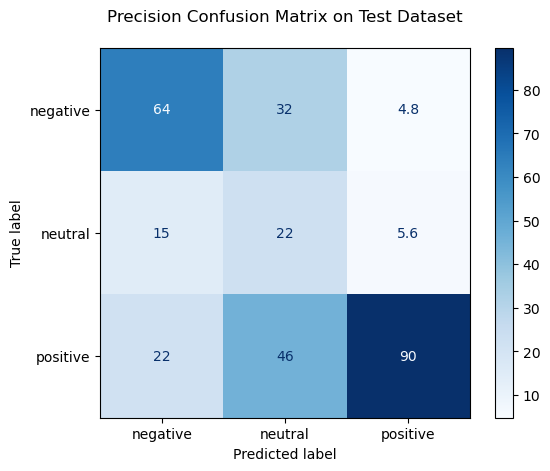

In [190]:
train_matrix = confusion_matrix(y_test, y_test_pred, normalize='pred') * 100
confusion_matrix_display = ConfusionMatrixDisplay(train_matrix, display_labels=['negative', 'neutral', 'positive'])
confusion_matrix_display.plot(cmap='Blues')
plt.title('Precision Confusion Matrix on Test Dataset', y=1.05)
plt.savefig('../visualizations/linear_svm_test_confusion_matrix_precision_normalized.png')
plt.show()